In [1]:
import pandas as pd
import matplotlib.pyplot as plt #导入图像库
from sklearn.ensemble import RandomForestRegressor

In [18]:
#载入数据
data = pd.read_csv('cs-training.csv')
#数据集确实和分布情况
data.describe()#.to_csv('DataDescribe.csv')#了解数据集的分布情况


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [13]:
# 用随机森林对缺失值预测填充函数
def set_missing(df):
    # 把已有的数值型特征取出来
    process_df = df.ix[:,[5,0,1,2,3,4,6,7,8,9]]
    # 分成已知该特征和未知该特征两部分
    known = process_df[process_df.MonthlyIncome.notnull()].as_matrix()
    unknown = process_df[process_df.MonthlyIncome.isnull()].as_matrix()
    # X为特征属性值
    X = known[:, 1:]
    # y为结果标签值
    y = known[:, 0]
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=200,max_depth=3,n_jobs=-1)
    rfr.fit(X,y)
    # 用得到的模型进行未知特征值预测
    predicted = rfr.predict(unknown[:, 1:]).round(0)
    print(predicted)
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.MonthlyIncome.isnull()), 'MonthlyIncome'] = predicted
    return df

In [14]:
data=set_missing(data)#用随机森林填补比较多的缺失值
data.to_csv('MissingData1.csv',index=False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


[8311. 1159. 8311. ... 1159. 2554. 2554.]


In [15]:
data=data.dropna()#删除比较少的缺失值
data=data.drop_duplicates()#删除重复项
data.to_csv('MissingData2.csv',index=False)

In [17]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,145563.000000,145563.000000,145563.000000,145563.000000,145563.000000,1.455630e+05,145563.000000,145563.000000,145563.000000,145563.000000,145563.000000
mean,0.067538,5.941378,52.110701,0.389185,334.548251,6.116310e+03,8.553788,0.231309,1.033346,0.205622,0.759863
std,0.250952,250.510835,14.567652,3.756944,1947.228209,1.318221e+04,5.141132,3.728803,1.133115,3.712455,1.116141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.031218,41.000000,0.000000,0.173934,2.554000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.158817,52.000000,0.000000,0.359090,5.000000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.561085,62.000000,0.000000,0.770641,8.166000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,107.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [19]:
data=data[data['age']>0]

In [20]:
data379=data[['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse']]

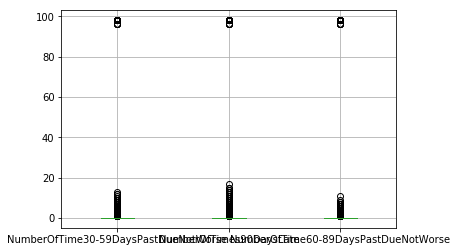

In [21]:
data379.boxplot()

In [22]:
data = data[data['NumberOfTime30-59DaysPastDueNotWorse'] < 90]
data379 = data[['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']]

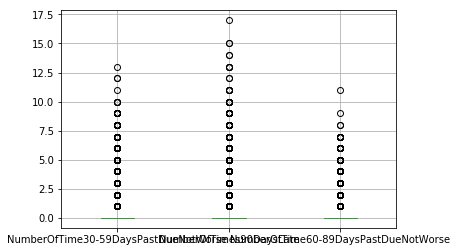

In [23]:
data379.boxplot()